In [1]:
## Machine Learning Online Class - Exercise 2: Logistic Regression
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the second part
#  of the exercise which covers regularization with logistic regression.
#
#  You will need to complete the following functions in this exericse:
#
#     sigmoid.py
#     costFunction.py
#     gradientFunction.py
#     predict.py
#     costFunctionReg.py
#     gradientFunctionReg.py
#     n.b. This files differ in number from the Octave version of ex2.
#          This is due to the scipy optimization taking only scalar
#          functions where fmiunc in Octave takes functions returning
#          multiple values.
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

In [2]:
from matplotlib import use
use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Logistic Regression
import numpy as np
from scipy.optimize import minimize

from costFunction import costFunction
from gradientFunction import gradientFunction
from sigmoid import sigmoid
from predict import predict
from show import show

(100, 2)
Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


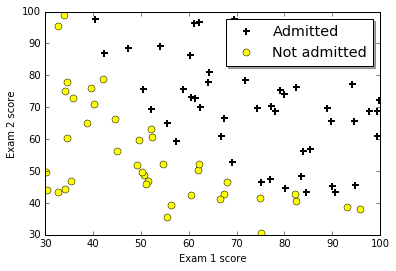

In [4]:
from ml import plotData, plotDecisionBoundary
# Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
print X.shape
# ==================== Part 1: Plotting ====================

print 'Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.'

plotData(X, y)
plt.legend(['Admitted', 'Not admitted'], loc='upper right', shadow=True, fontsize='x-large', numpoints=1)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
show()
#raw_input("Program paused. Press Enter to continue...")

In [5]:
# # ============ Part 2: Compute Cost and Gradient ============
# #  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

print m, n
# Add intercept term to x and X_test
X = np.concatenate((np.ones((m, 1)), X), axis=1)
print X.shape

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)
# print initial_theta.shape, y.shape

# Compute and display initial cost and gradient
cost = costFunction(initial_theta, X, y)
print 'Cost at initial theta (zeros): %f' % cost

100 2
(100, 3)
Cost at initial theta (zeros): 0.693147


In [6]:
grad = gradientFunction(initial_theta, X, y)
print 'Gradient at initial theta (zeros): ' + str(grad)

#raw_input("Program paused. Press Enter to continue...")

Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


Cost at theta found by scipy: 0.205527
theta: ['-25.7415', '0.2031', '0.2134']


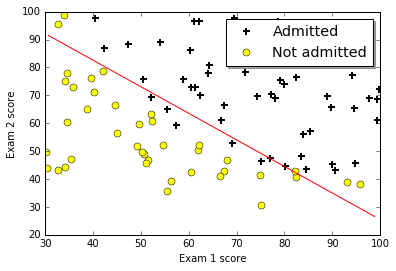

In [7]:
# ============= Part 3: Optimizing using scipy  =============
res = minimize(costFunction, initial_theta, method='TNC',
               jac=False, args=(X, y), options={'gtol': 1e-3, 'disp': True, 'maxiter': 1000})

theta = res.x
cost = res.fun

# Print theta to screen
print 'Cost at theta found by scipy: %f' % cost
print 'theta:', ["%0.4f" % i for i in theta]

# Plot Boundary
plotDecisionBoundary(theta, X, y)

# Labels and Legend
plt.legend(['Admitted', 'Not admitted'], loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
show()

#raw_input("Program paused. Press Enter to continue...")

In [8]:
#  ============== Part 4: Predict and Accuracies ==============

#  Predict probability for a student with score 45 on exam 1
#  and score 85 on exam 2

prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print 'For a student with scores 45 and 85, we predict an admission probability of %f' % prob

# Compute accuracy on our training set
p = predict(theta, X)
#acc = 1.0*np.where(p == y)[0].size/len(p) * 100
acc = np.mean(p==y)*100
print 'Train Accuracy: %f' % acc


For a student with scores 45 and 85, we predict an admission probability of 0.822708
Train Accuracy: 90.000000
